In [30]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import statsmodels.api as sm


read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [46]:
filtered_values = np.where((df["date"].dt.year <= 2002)  | ((df["date"].dt.year == 2003) & (df["date"].dt.month <= 5)))
data_war = df.loc[filtered_values]
x = data_war.index.values.reshape(-1,1)
y = data_war['SPD']
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)

(73,)

In [47]:
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

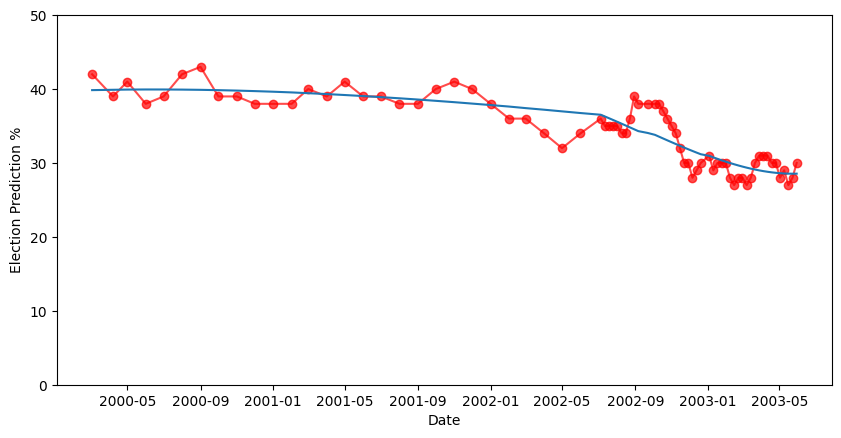

In [49]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war['date'],ypred)

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPD   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     93.75
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           2.75e-24
Time:                        16:23:18   Log-Likelihood:                -155.53
No. Observations:                  73   AIC:                             319.1
Df Residuals:                      69   BIC:                             328.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.019e+04   9287.666      2.173      0.033    1657.663    3.87e+04
x1           -93.2644     42.713     -2.184      0.032    -178.475      -8.054
x2             0.1435      0.065      2.193      0.032       0.013       0.274
x3         -7.339e-05   3.34e-05     -2.197      0.031      -0.000   -6.75e-06
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.933
Skew:                           0.356   Prob(JB):                        0.380
Kurtosis:                       2.640   Cond. No.                     1.06e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

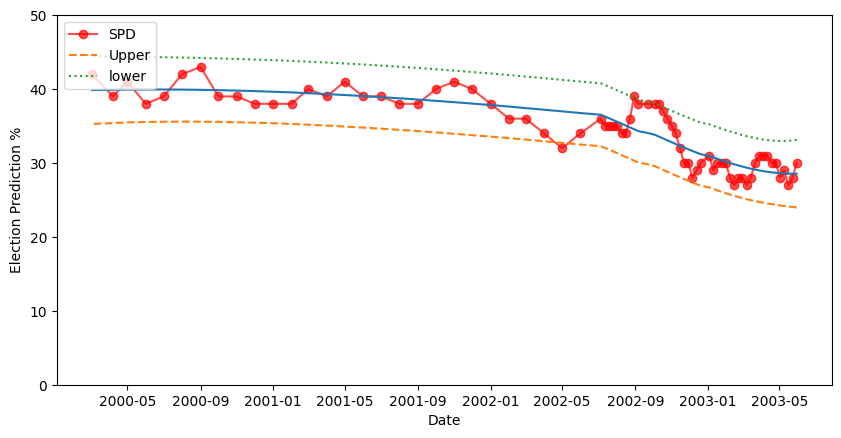

In [53]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

fig, ax1 = plt.subplots()
fig.set_figwidth(10) 
ax1.set_ylim([0, 50])
ax1.set_xlabel('Date') 
ax1.set_ylabel('Election Prediction %')
ax1.plot(data_war['date'], data_war['SPD'], marker='o', linestyle='-',label='SPD', color='red', alpha=0.7)
ax1.plot(data_war['date'],ypred)
ax1.plot(data_war['date'],upper,'--',label="Upper") # confid. intrvl
ax1.plot(data_war['date'],lower,':',label="lower")
ax1.legend(loc='upper left')